In [1]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers

In [130]:
# import modules
import src.models
reload(src.models)
from src.models import *

import src.dataMethods
reload(src.dataMethods)
from src.dataMethods import *

In [ ]:
# get data frame with variables of interest
df_gesture = CSV2VoI('data/recordings/gesture_nongesture.csv')

In [37]:
# get the unique gestures in the df
print(df_gesture['gesture'].unique())
# get dictionaries for mapping from gestures to ids, and vice versa
g2idx = {'no_gesture': 0, 'so_so': 1}
idx2g = {i: g for g, i in g2idx.items()}

['no_gesture' 'so_so']


In [59]:
# extract X and y
X0, y = df2X_y(df_gesture, g2idx)
print(X0.shape)
print(y.shape)
print(y[:20])

dropped 0 of 6371 rows with nans
(6371, 21)
(6371,)
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [61]:
# separate into examples 250 frames long each
n_frames = 250
X1 = split2examples(X0, n_frames)
y1 = split2examples(y, n_frames)
print(X1.shape)
print(y1.shape)

(25, 250, 21)
(25, 250)


In [64]:
# for random shuffling like this, see:
# https://stackoverflow.com/questions/4601373/better-way-to-shuffle-two-numpy-arrays-in-unison
synced_shuffle(X1, y1)

(25, 250, 21)

In [132]:
model = many2many(n_gestures=len(g2idx), n_features = X1.shape[-1], n_frames=X1.shape[1], rnn_units=32)

Model: "many2one"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 250, 21)]         0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 250, 32)           6912      
_________________________________________________________________
dense_2 (Dense)              (None, 250, 2)            66        
Total params: 6,978
Trainable params: 6,978
Non-trainable params: 0
_________________________________________________________________


In [133]:
opt = tf.keras.optimizers.Adam()
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X1, y1, epochs=65, batch_size = 32, validation_split=0.2)

Train on 20 samples, validate on 5 samples
Epoch 1/65
20/20 [==============================] - 3s 138ms/sample - loss: 0.8013 - accuracy: 0.3804 - val_loss: 0.7702 - val_accuracy: 0.3728
Epoch 2/65
20/20 [==============================] - 0s 6ms/sample - loss: 0.7804 - accuracy: 0.3970 - val_loss: 0.7496 - val_accuracy: 0.3968
Epoch 3/65
20/20 [==============================] - 0s 6ms/sample - loss: 0.7606 - accuracy: 0.4278 - val_loss: 0.7302 - val_accuracy: 0.4312
Epoch 4/65
20/20 [==============================] - 0s 5ms/sample - loss: 0.7418 - accuracy: 0.4492 - val_loss: 0.7119 - val_accuracy: 0.4992
Epoch 5/65
20/20 [==============================] - 0s 6ms/sample - loss: 0.7240 - accuracy: 0.4858 - val_loss: 0.6946 - val_accuracy: 0.5248
Epoch 6/65
20/20 [==============================] - 0s 6ms/sample - loss: 0.7072 - accuracy: 0.5356 - val_loss: 0.6783 - val_accuracy: 0.5752
Epoch 7/65
20/20 [==============================] - 0s 6ms/sample - loss: 0.6914 - accuracy: 0.5732 - v

20/20 [==============================] - 0s 5ms/sample - loss: 0.4004 - accuracy: 0.8410 - val_loss: 0.4325 - val_accuracy: 0.8144
Epoch 59/65
20/20 [==============================] - 0s 5ms/sample - loss: 0.3969 - accuracy: 0.8432 - val_loss: 0.4322 - val_accuracy: 0.8160
Epoch 60/65
20/20 [==============================] - 0s 6ms/sample - loss: 0.3932 - accuracy: 0.8438 - val_loss: 0.4313 - val_accuracy: 0.8184
Epoch 61/65
20/20 [==============================] - 0s 5ms/sample - loss: 0.3896 - accuracy: 0.8460 - val_loss: 0.4305 - val_accuracy: 0.8200
Epoch 62/65
20/20 [==============================] - 0s 5ms/sample - loss: 0.3861 - accuracy: 0.8466 - val_loss: 0.4304 - val_accuracy: 0.8216
Epoch 63/65
20/20 [==============================] - 0s 5ms/sample - loss: 0.3826 - accuracy: 0.8482 - val_loss: 0.4309 - val_accuracy: 0.8232
Epoch 64/65
20/20 [==============================] - 0s 5ms/sample - loss: 0.3793 - accuracy: 0.8496 - val_loss: 0.4274 - val_accuracy: 0.8256
Epoch 65/65

In [85]:
pred = np.argmax(model.predict(np.array([X1[0]])), axis=-1)

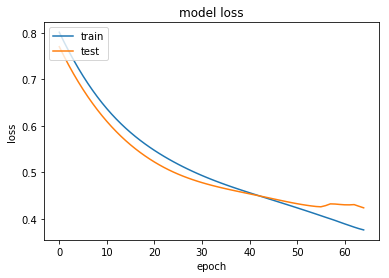

In [134]:
# plot history:
## summarize history for loss, from https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
plt_metric(history, 'loss')

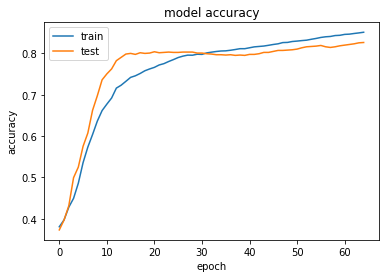

In [135]:
plt_metric(history, 'accuracy')

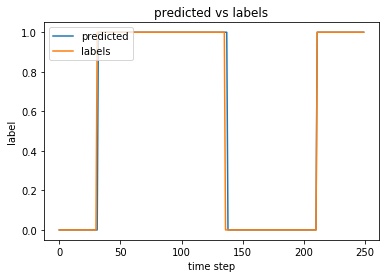

In [136]:
# plot truth vs labels
plt_pred(y1[0], pred)